<a href="https://colab.research.google.com/github/YarkoMarko/plt/blob/main/module2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [70]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

Loud Cover не містить нічого інформативного. Його можна видалити

In [71]:
df = df.drop(columns=["Loud Cover"])
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


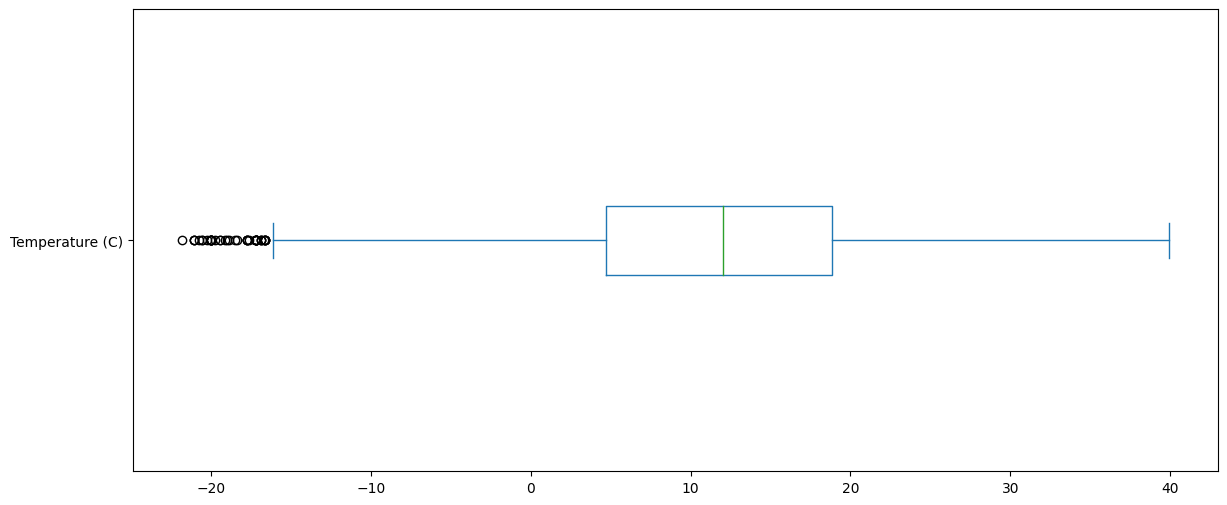

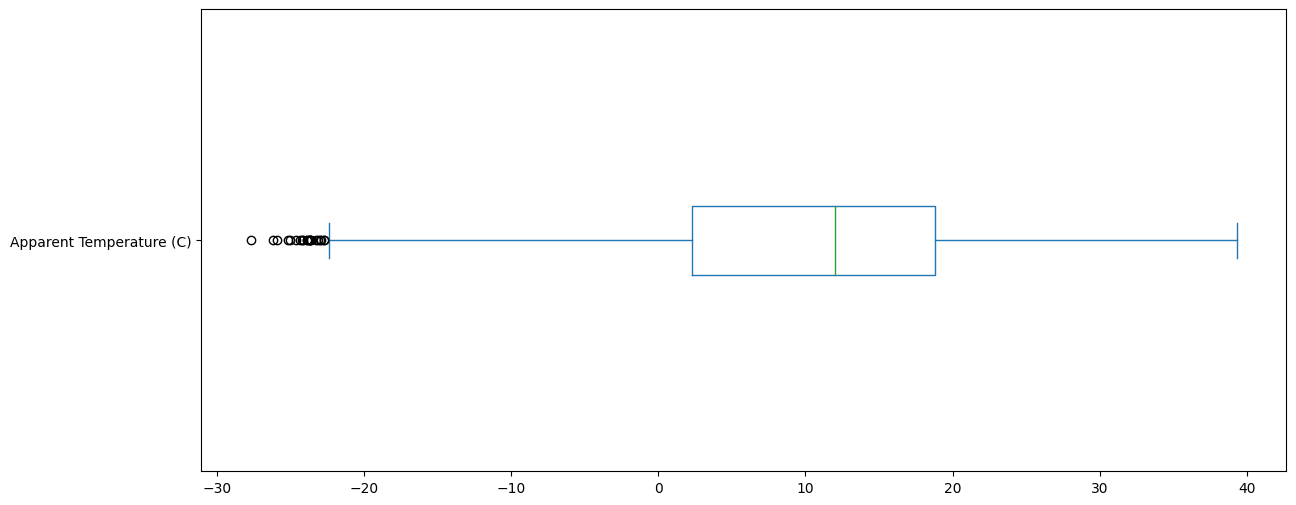

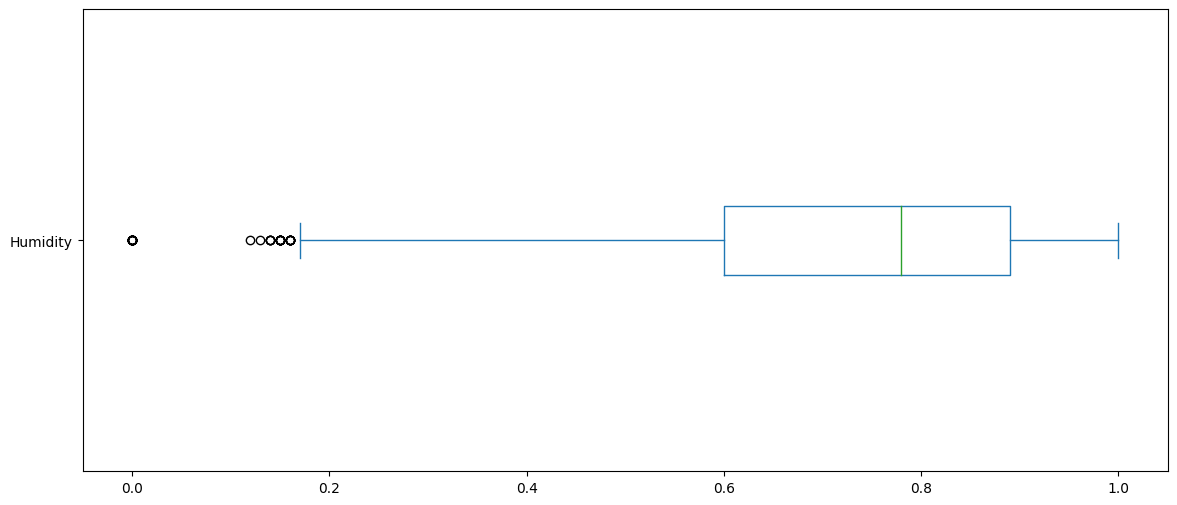

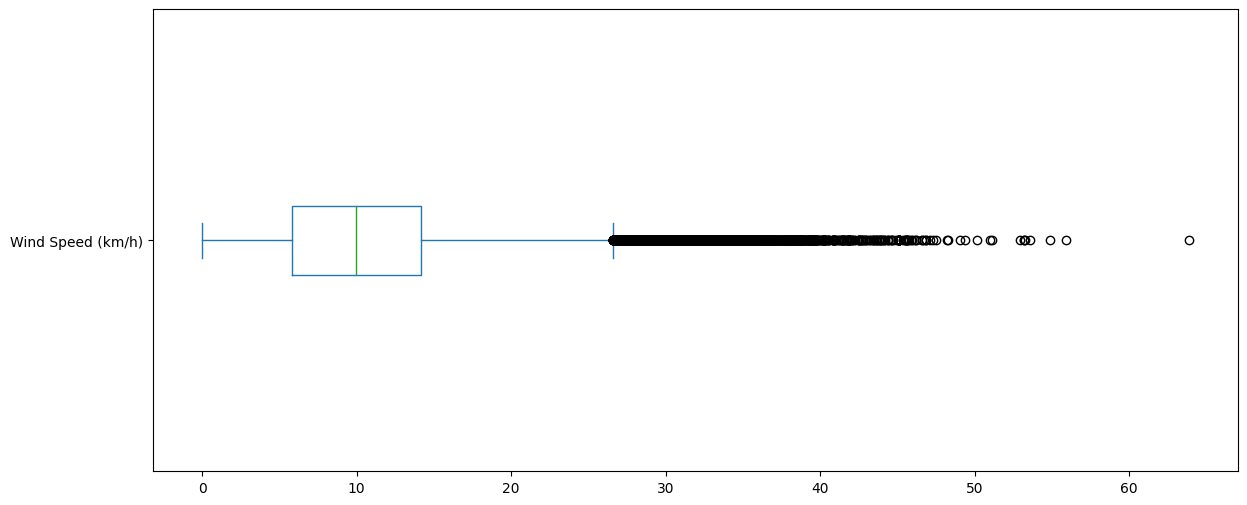

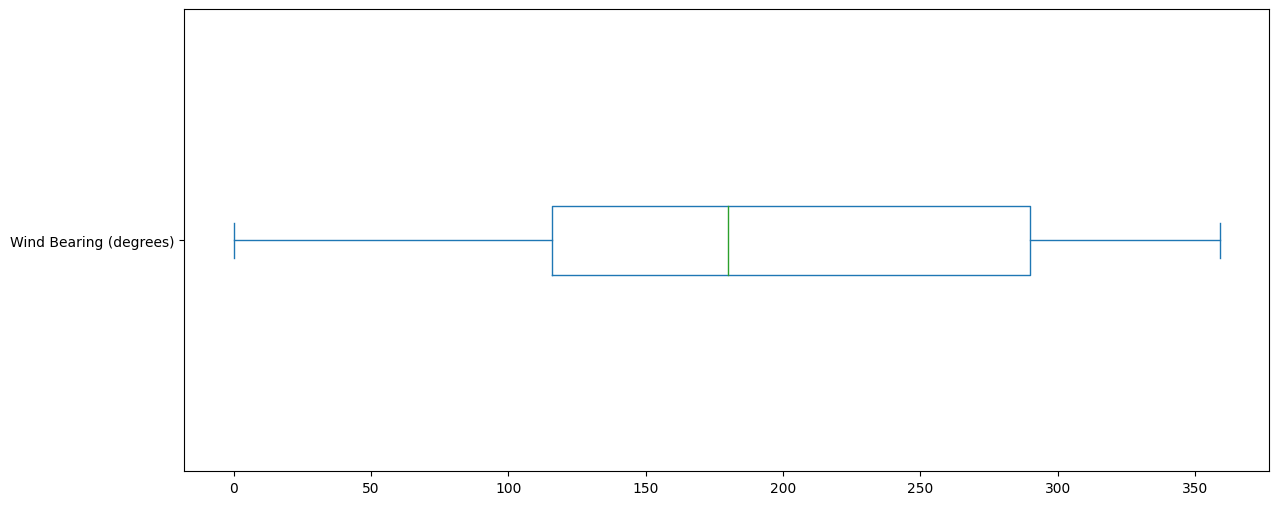

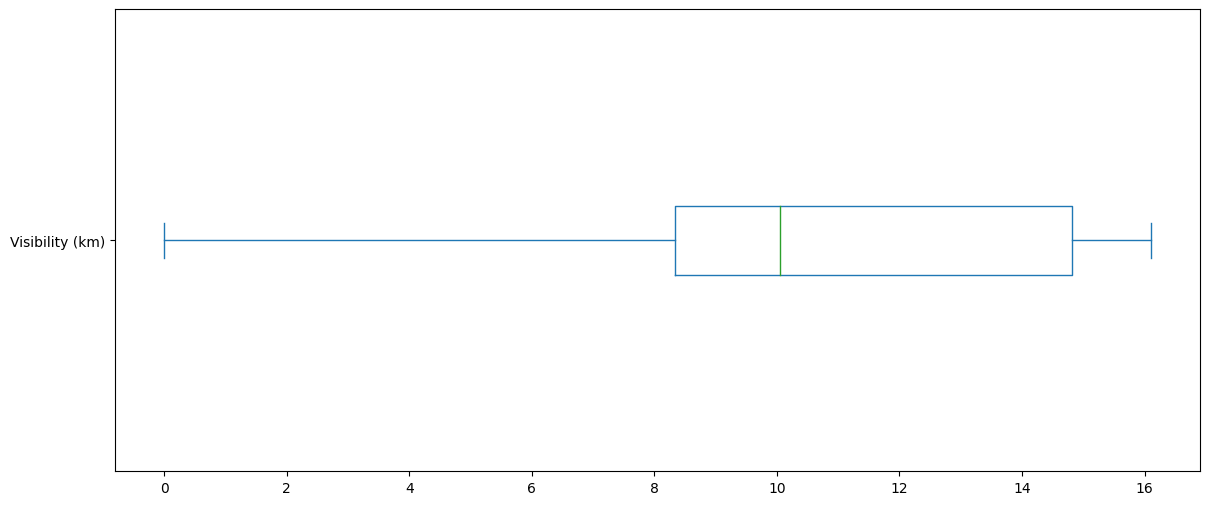

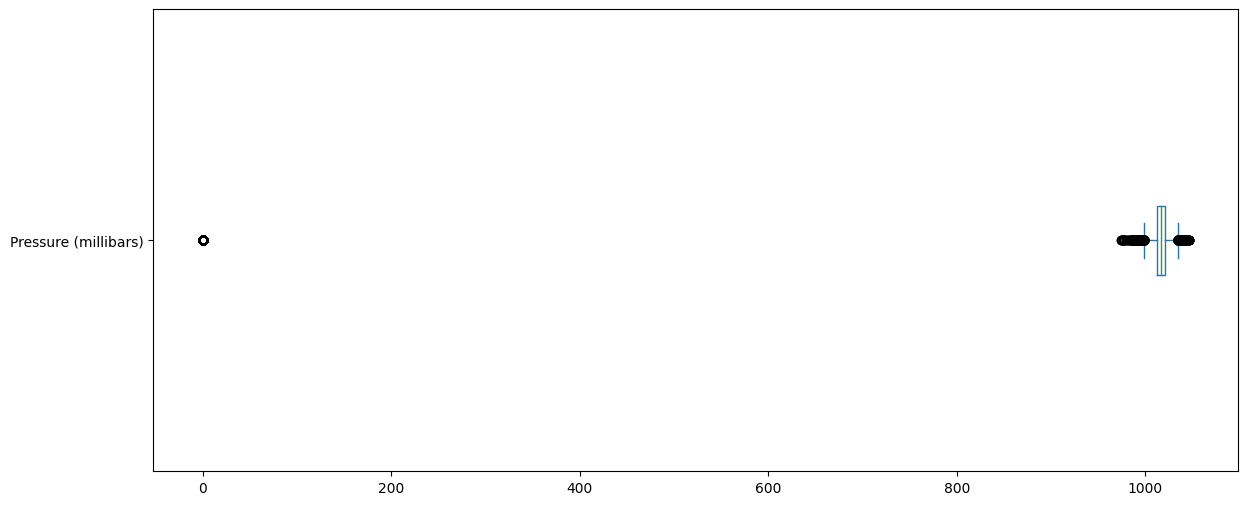

In [72]:
num_columns = df.select_dtypes(include="number").columns
for column in num_columns:
  df[column].plot(kind="box", vert=False, figsize=(14, 6))
  plt.show()

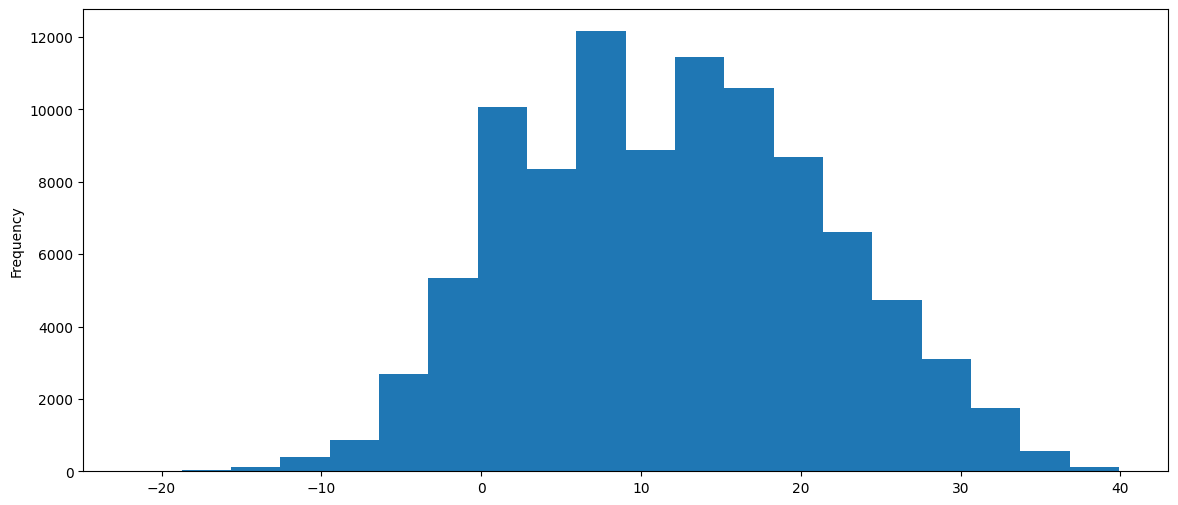

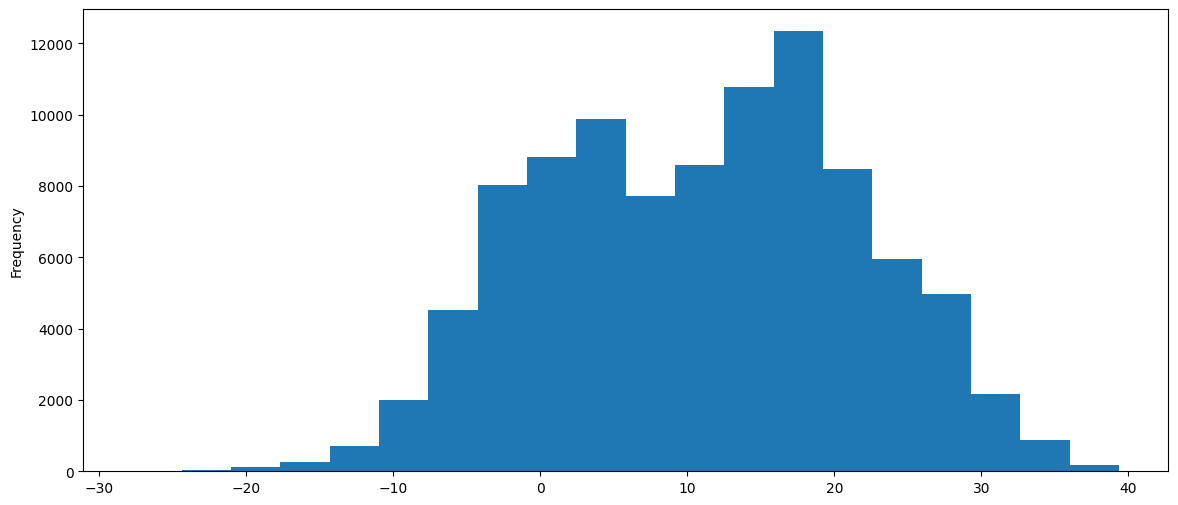

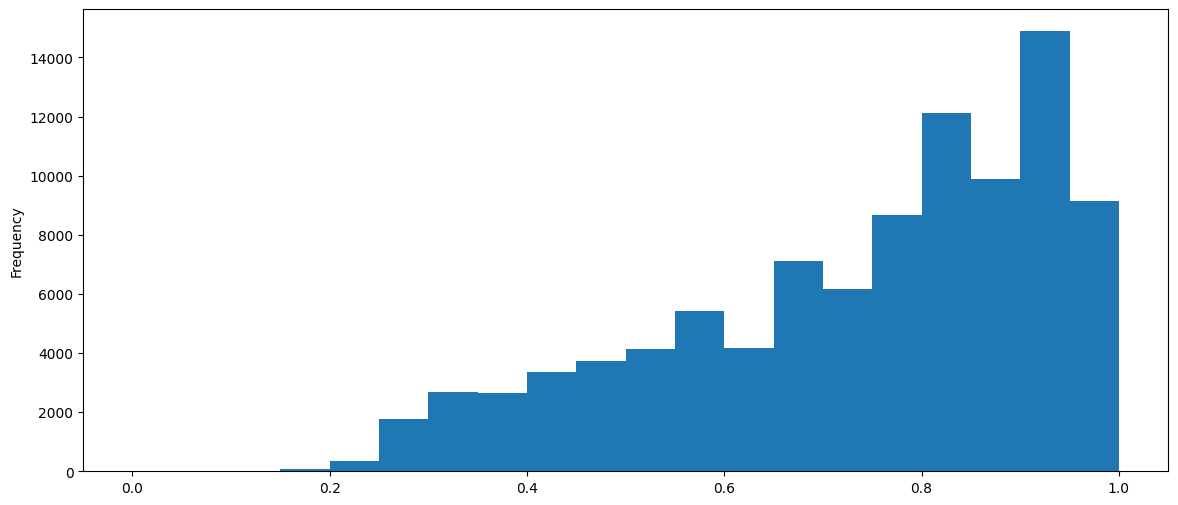

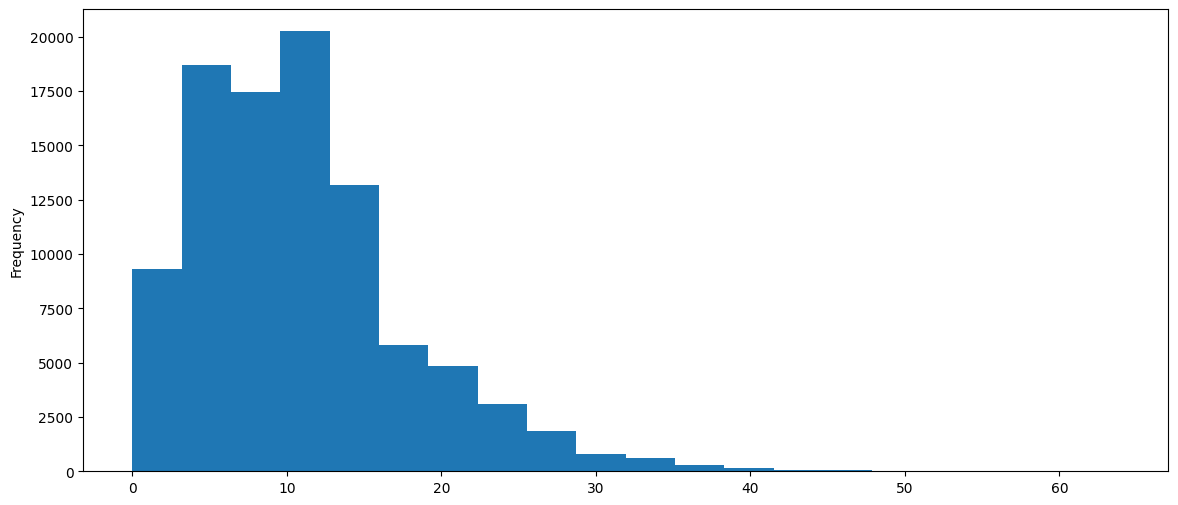

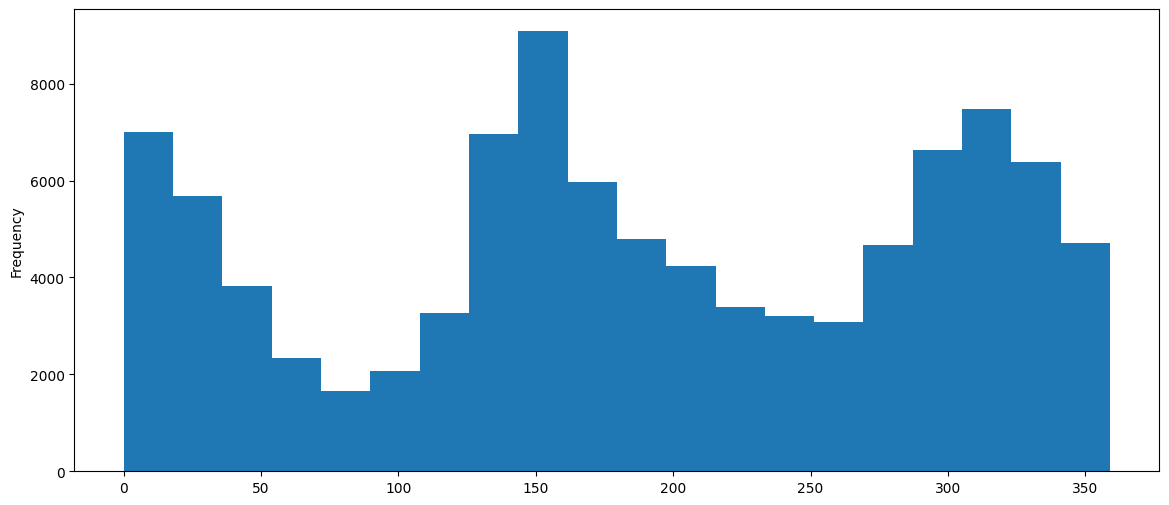

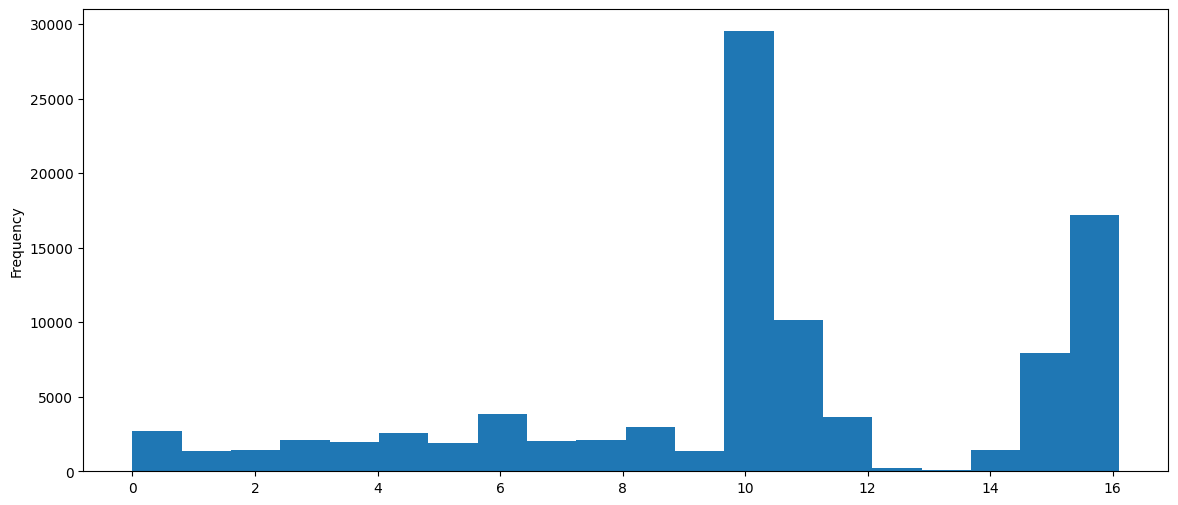

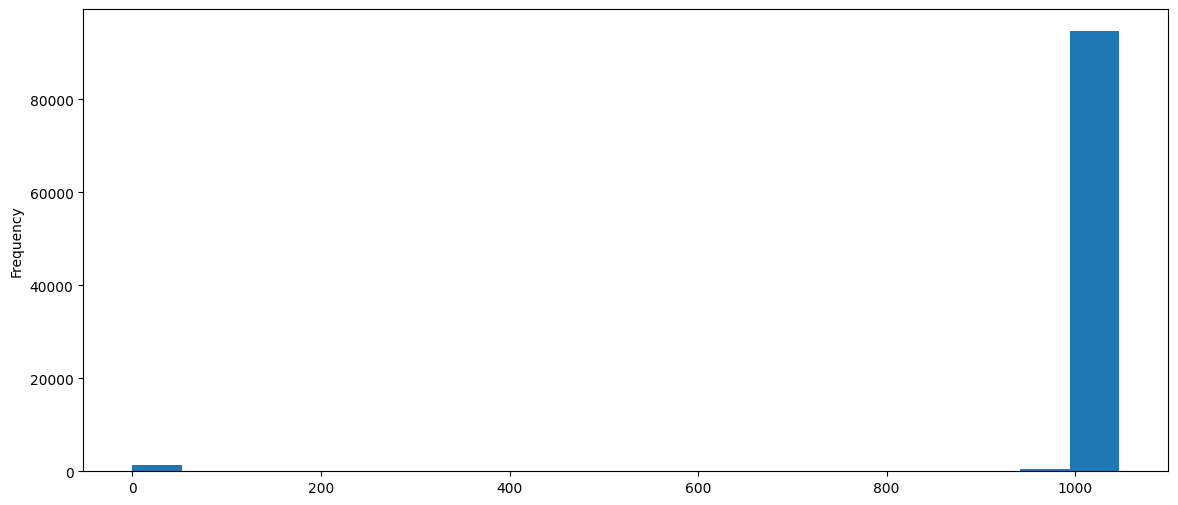

In [74]:
for column in num_columns:
  df[column].plot(kind="hist", bins=20, figsize=(14, 6))
  plt.show()

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

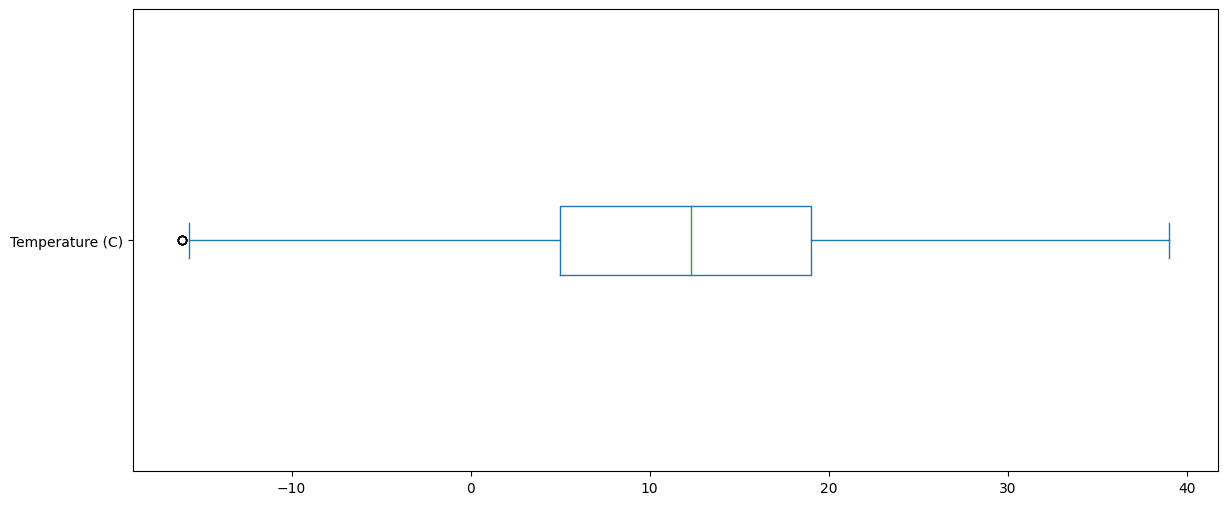

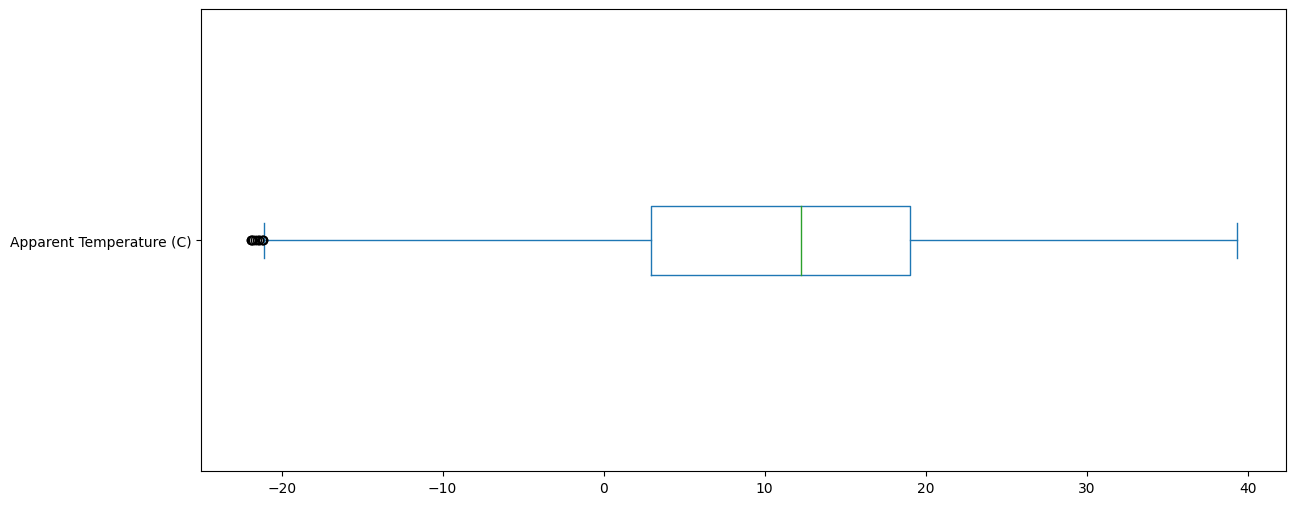

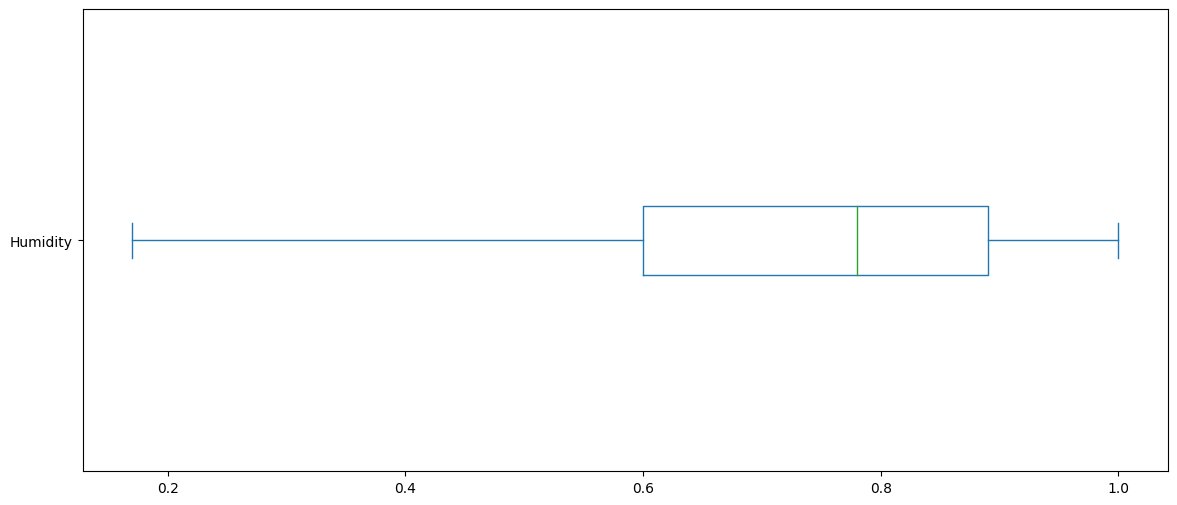

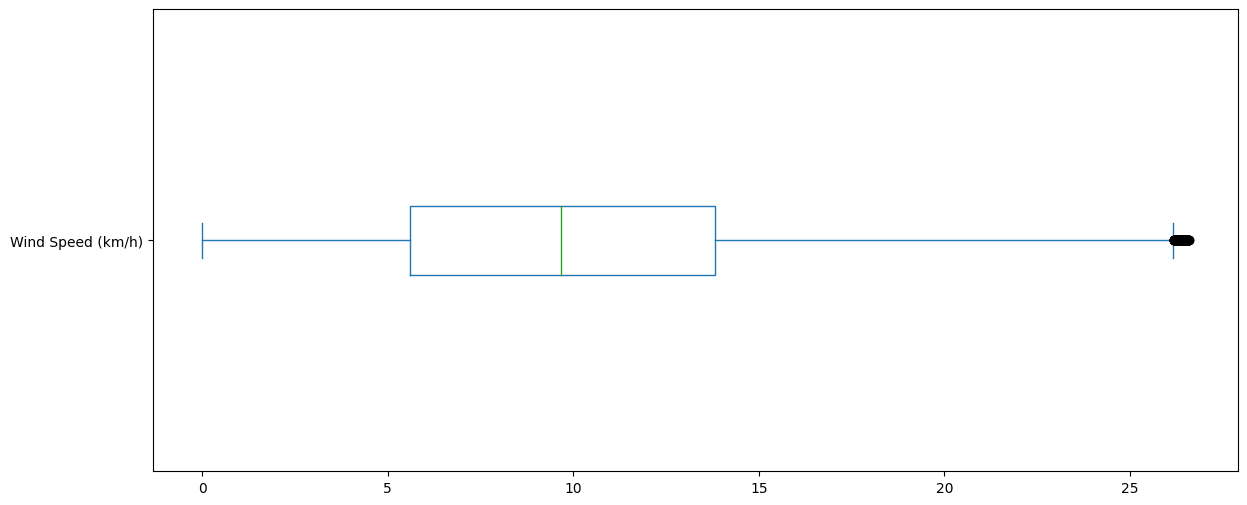

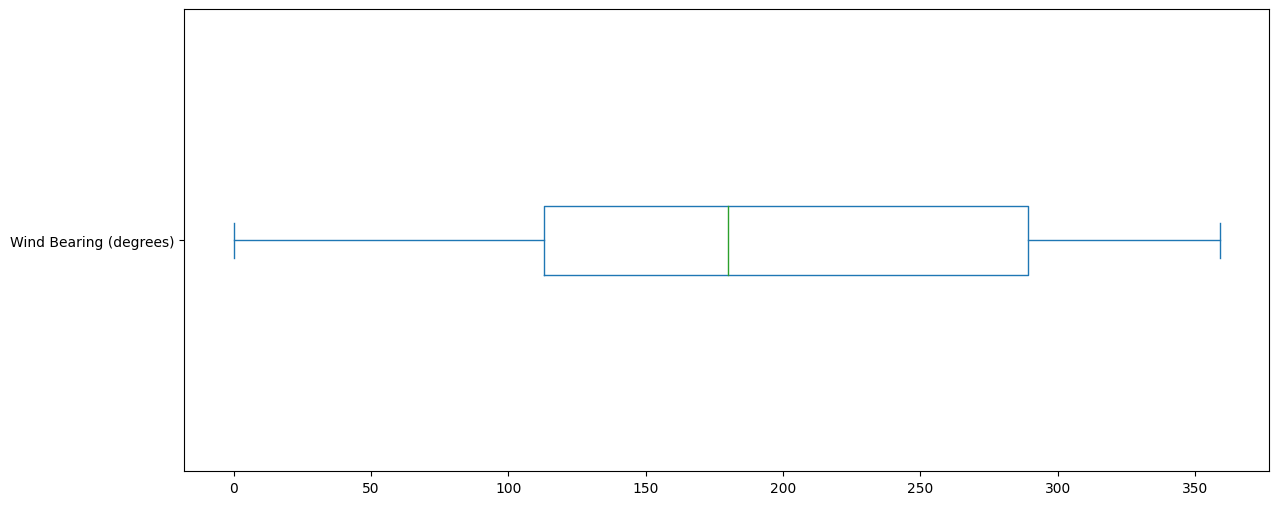

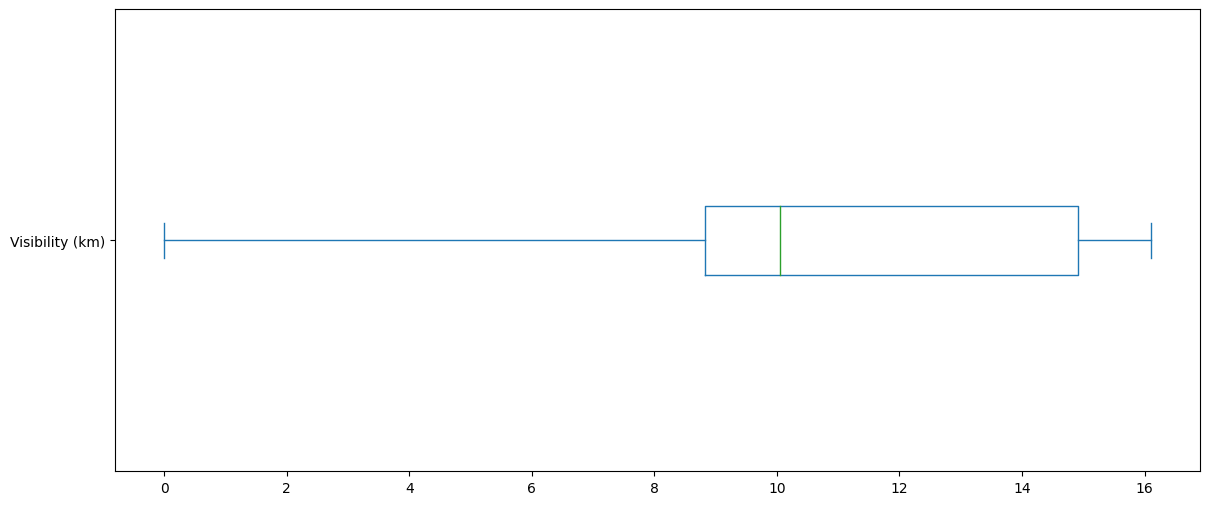

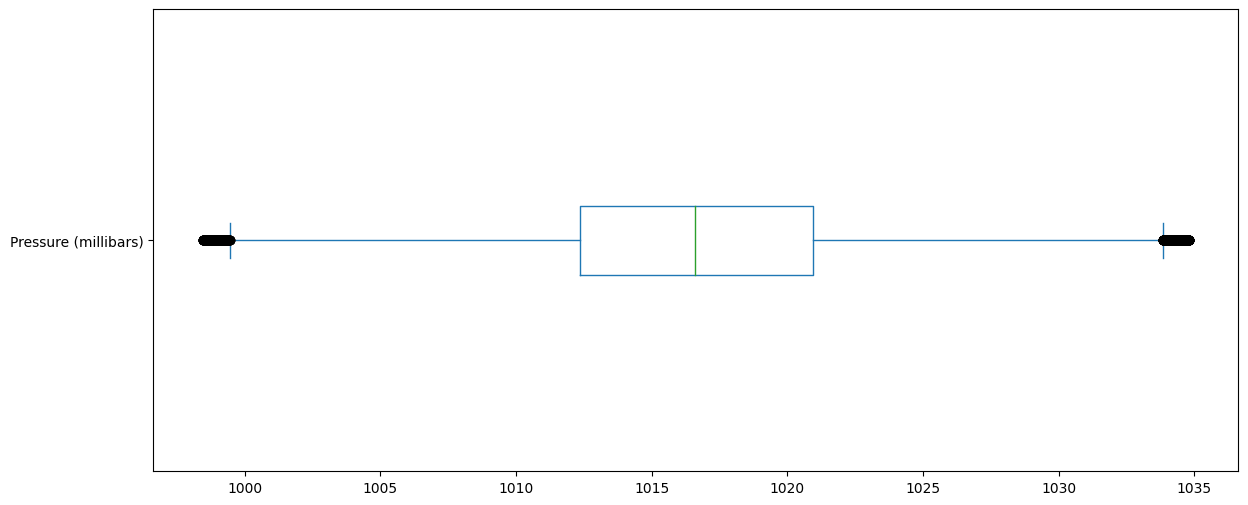

In [75]:
def remove(df, column_df):
  column = df[column_df]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column in num_columns:
  df = remove(df, column)

for column in num_columns:
  df[column].plot(kind="box", vert=False, figsize=(14, 6))
  plt.show()

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

In [94]:
corr = df.corr(method="pearson")

corr


<ipython-input-94-7f9e4571eaf2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method="pearson")


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993492,-0.647394,0.019824,0.025412,0.387728,-0.306141
Apparent Temperature (C),0.993492,1.000000,-0.619455,-0.039646,0.025747,0.379826,-0.290610
Humidity,-0.647394,-0.619455,1.000000,-0.224107,0.009915,-0.363915,0.036374
Wind Speed (km/h),0.019824,-0.039646,-0.224107,1.000000,0.080378,0.092762,-0.195650
Wind Bearing (degrees),0.025412,0.025747,0.009915,0.080378,1.000000,0.049834,-0.074306
Visibility (km),0.387728,0.379826,-0.363915,0.092762,0.049834,1.000000,-0.148940
Pressure (millibars),-0.306141,-0.290610,0.036374,-0.195650,-0.074306,-0.148940,1.000000


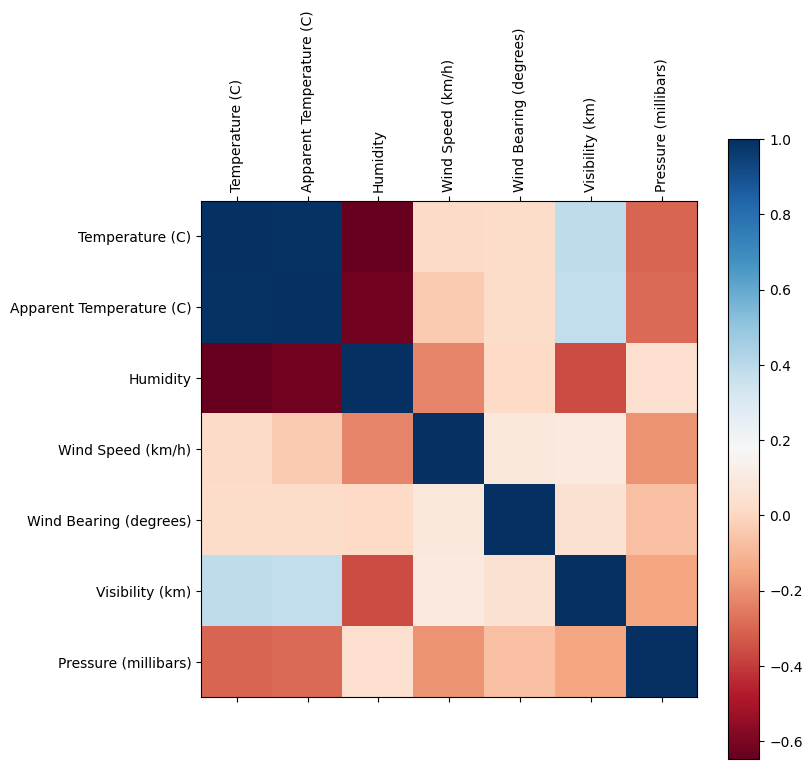

In [77]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

<Axes: xlabel='Temperature (C)', ylabel='Humidity'>

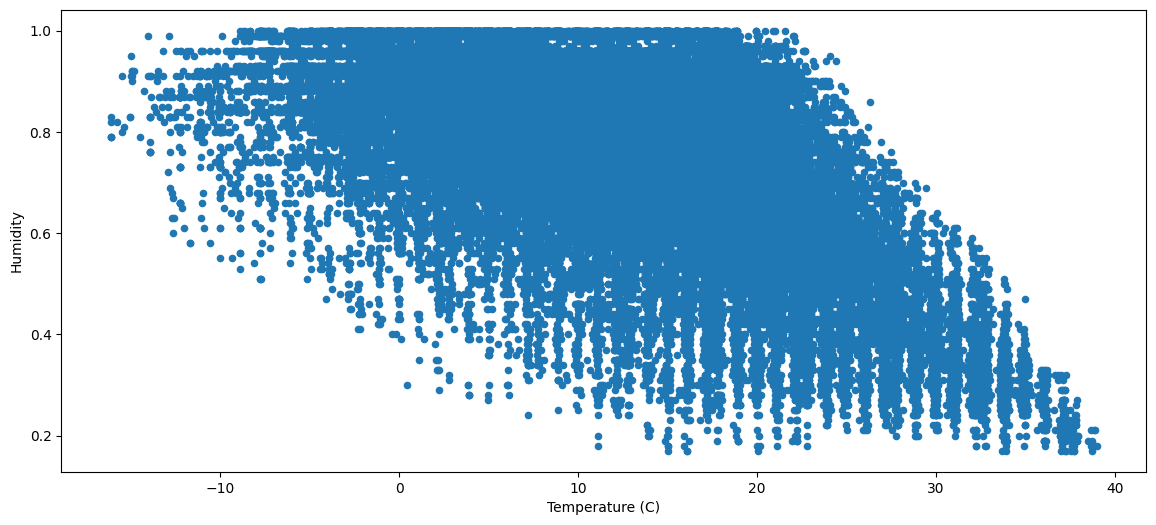

In [96]:
df.plot(kind="scatter", x="Temperature (C)", y="Humidity", figsize=(14, 6))

<Axes: xlabel='Temperature (C)', ylabel='Apparent Temperature (C)'>

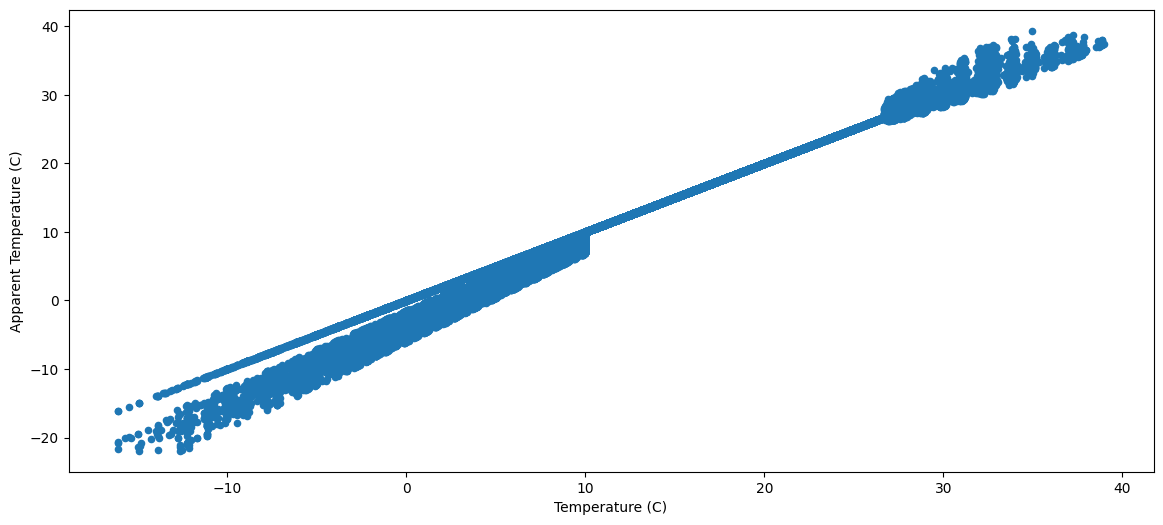

In [97]:
df.plot(kind="scatter", x="Temperature (C)", y="Apparent Temperature (C)", figsize=(14, 6))

<Axes: xlabel='Humidity', ylabel='Apparent Temperature (C)'>

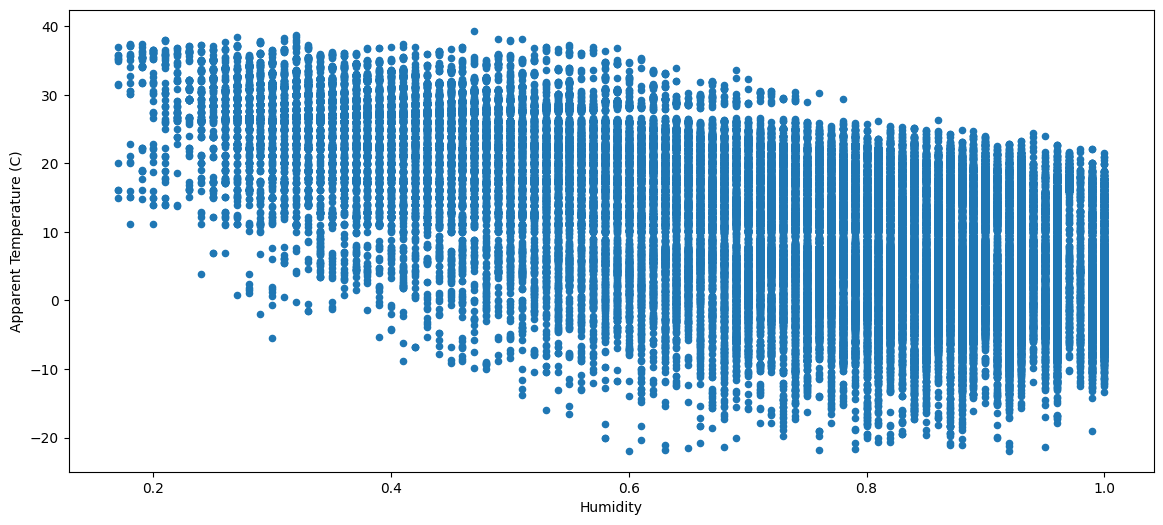

In [98]:
df.plot(kind="scatter", x="Humidity", y="Apparent Temperature (C)", figsize=(14, 6))

<Axes: xlabel='Temperature (C)', ylabel='Visibility (km)'>

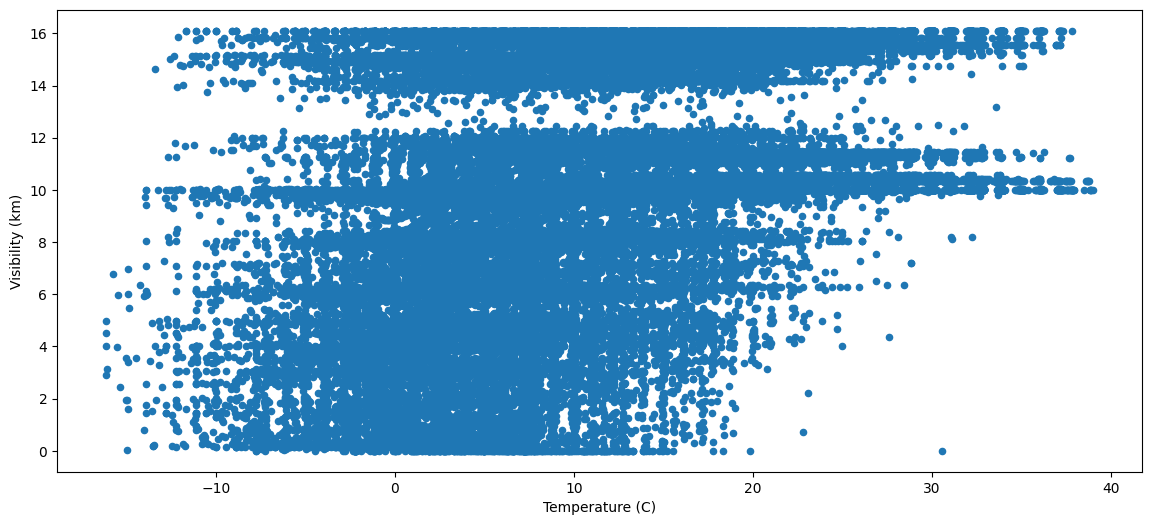

In [99]:
df.plot(kind="scatter", x="Temperature (C)", y="Visibility (km)", figsize=(14, 6))

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [78]:
df.describe(include="object")

,Formatted Date,Summary,Precip Type,Daily Summary
count,89174,89174,88679,89174
unique,89150,14,2,212
top,2010-08-02 14:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,30829,79733,19242


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

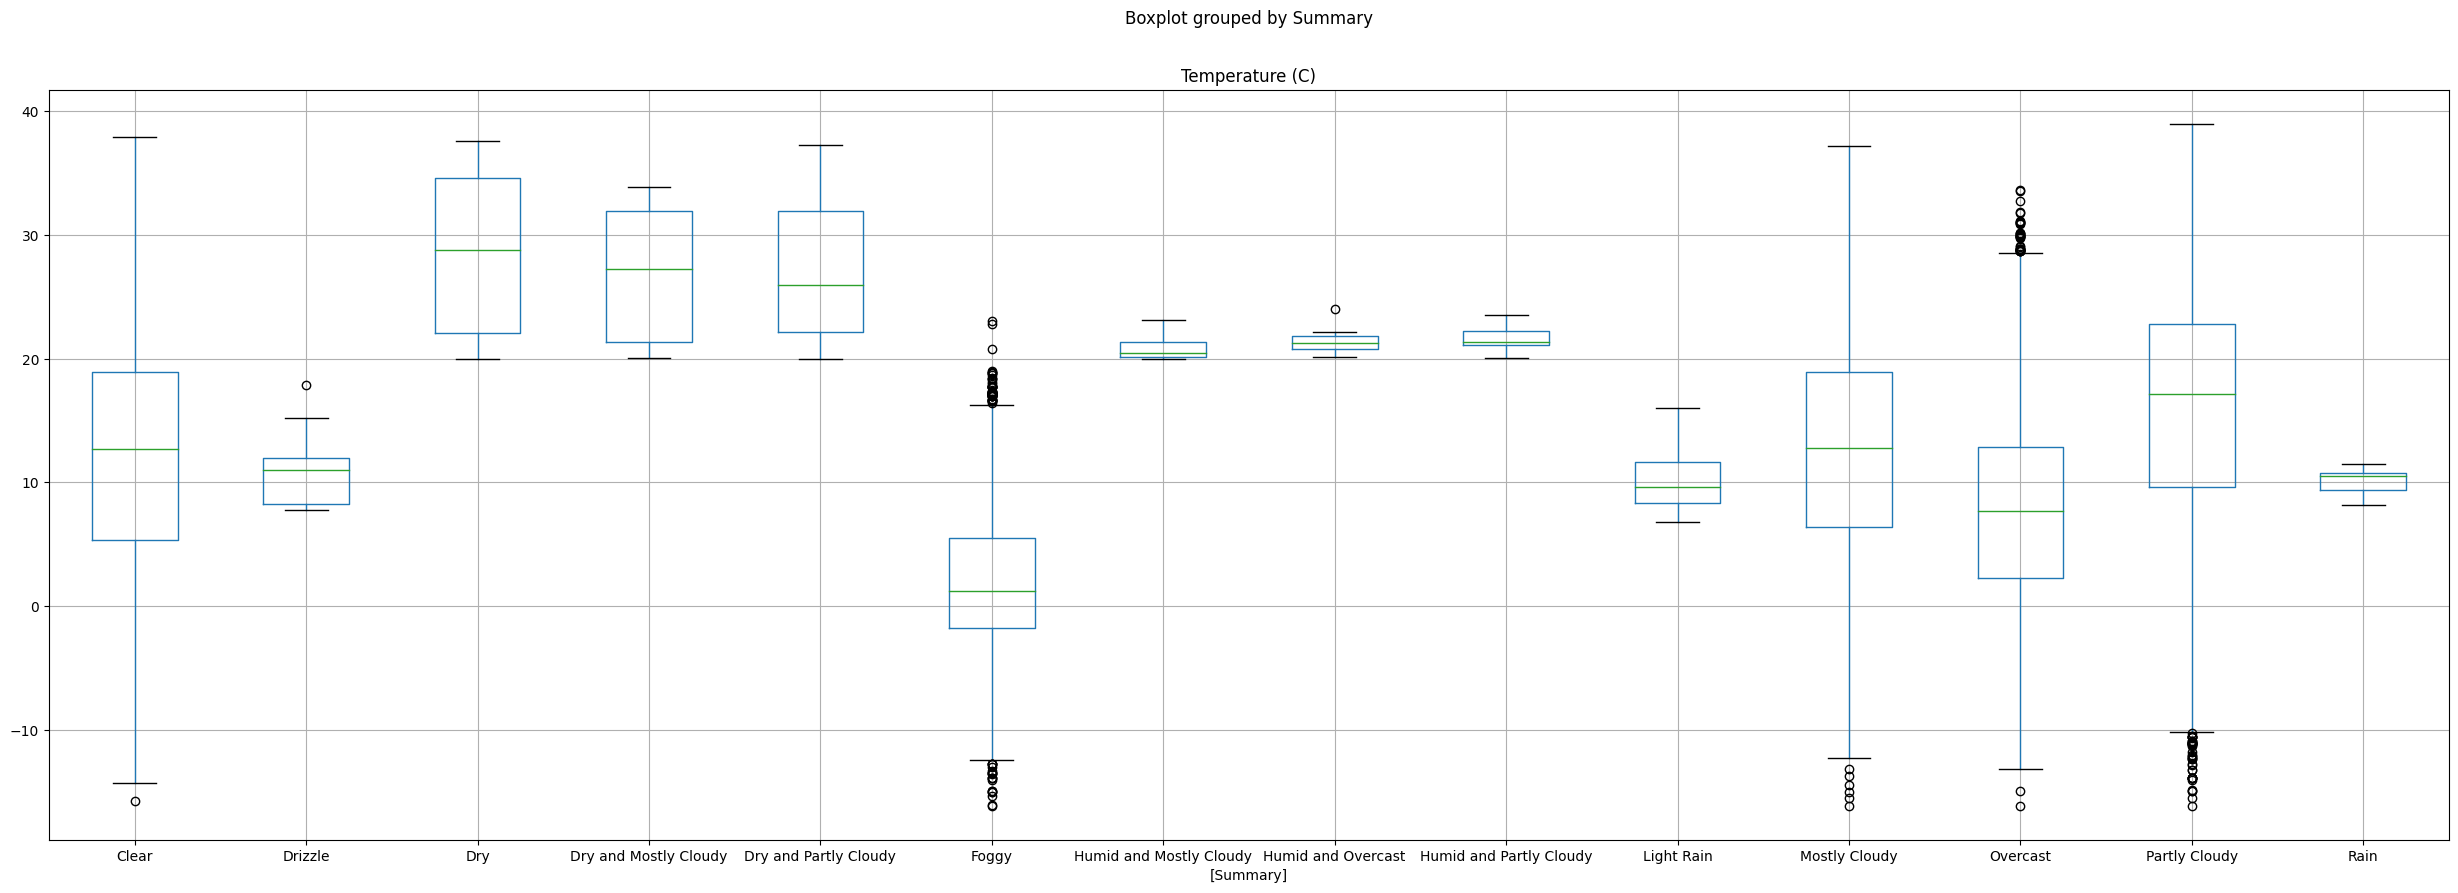

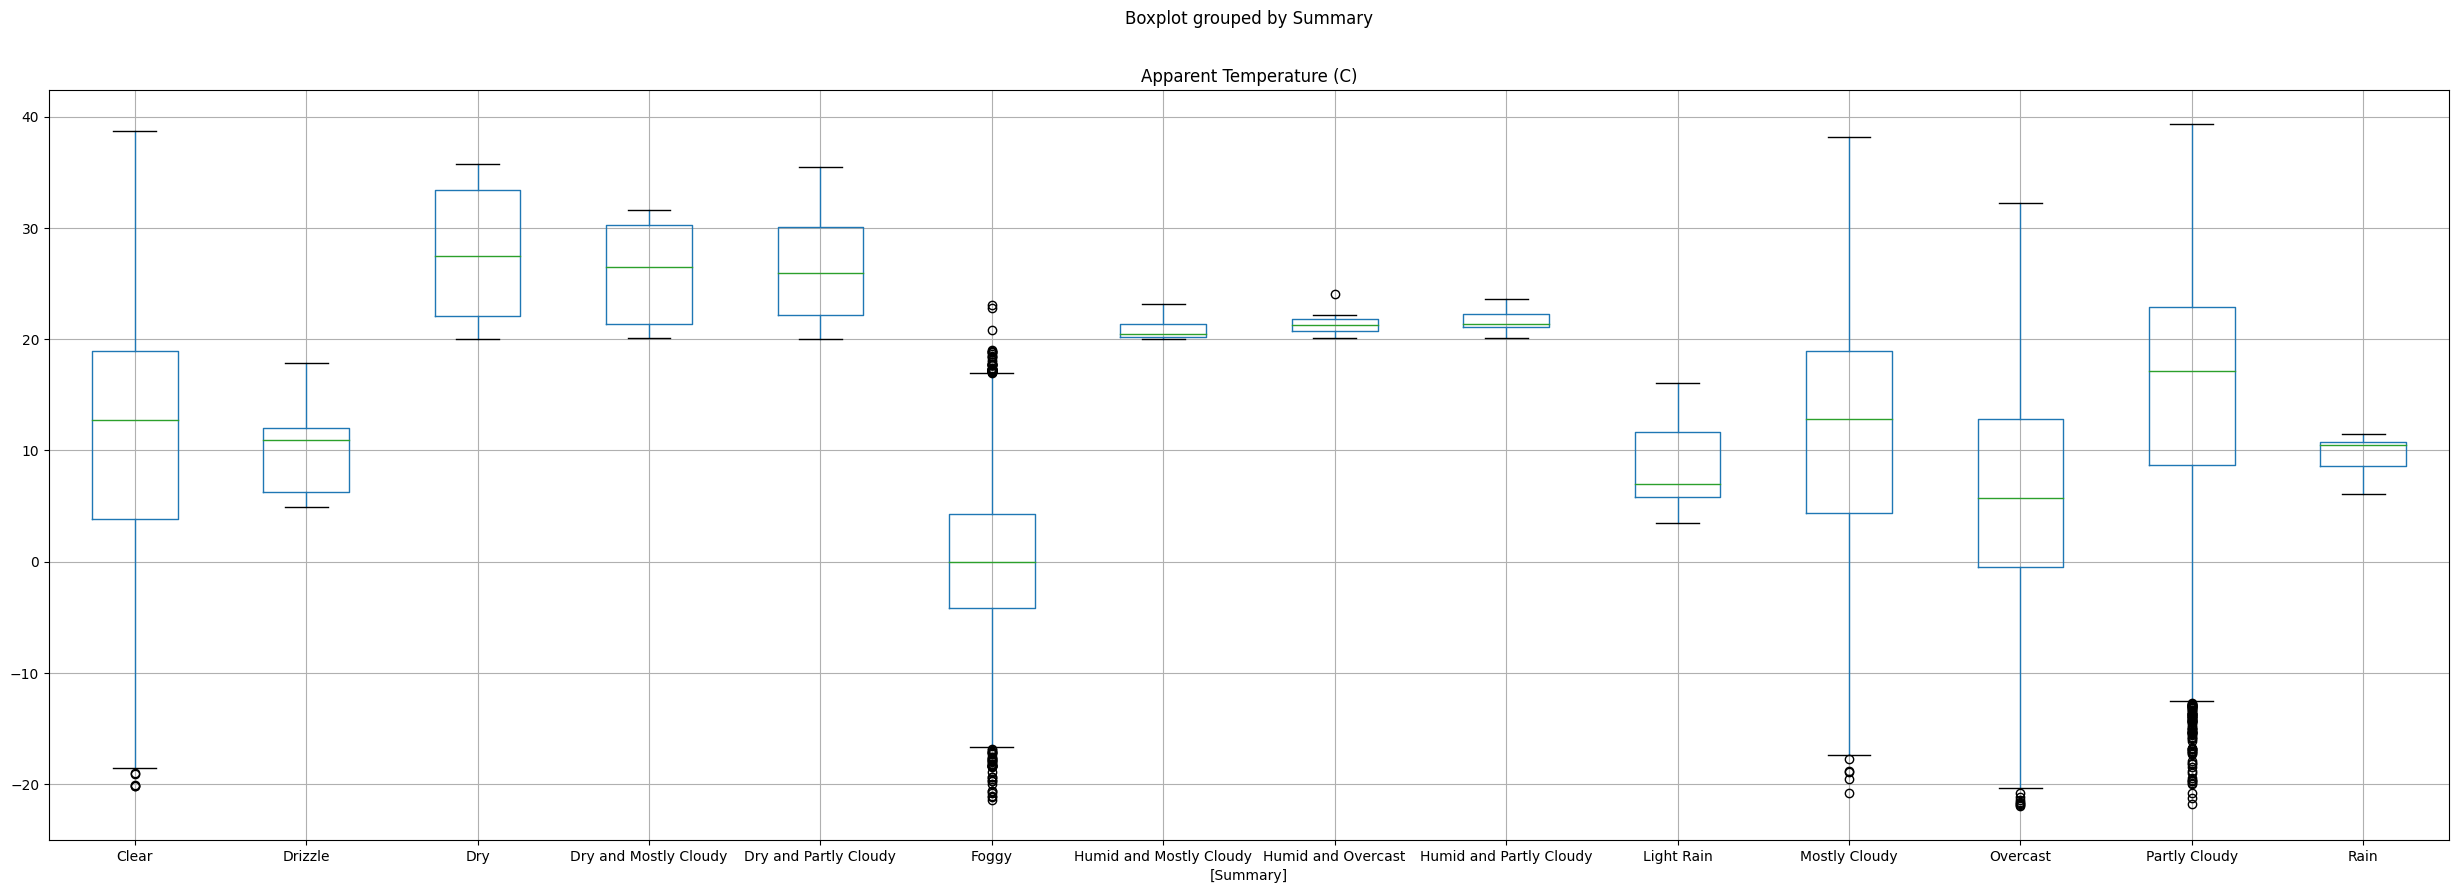

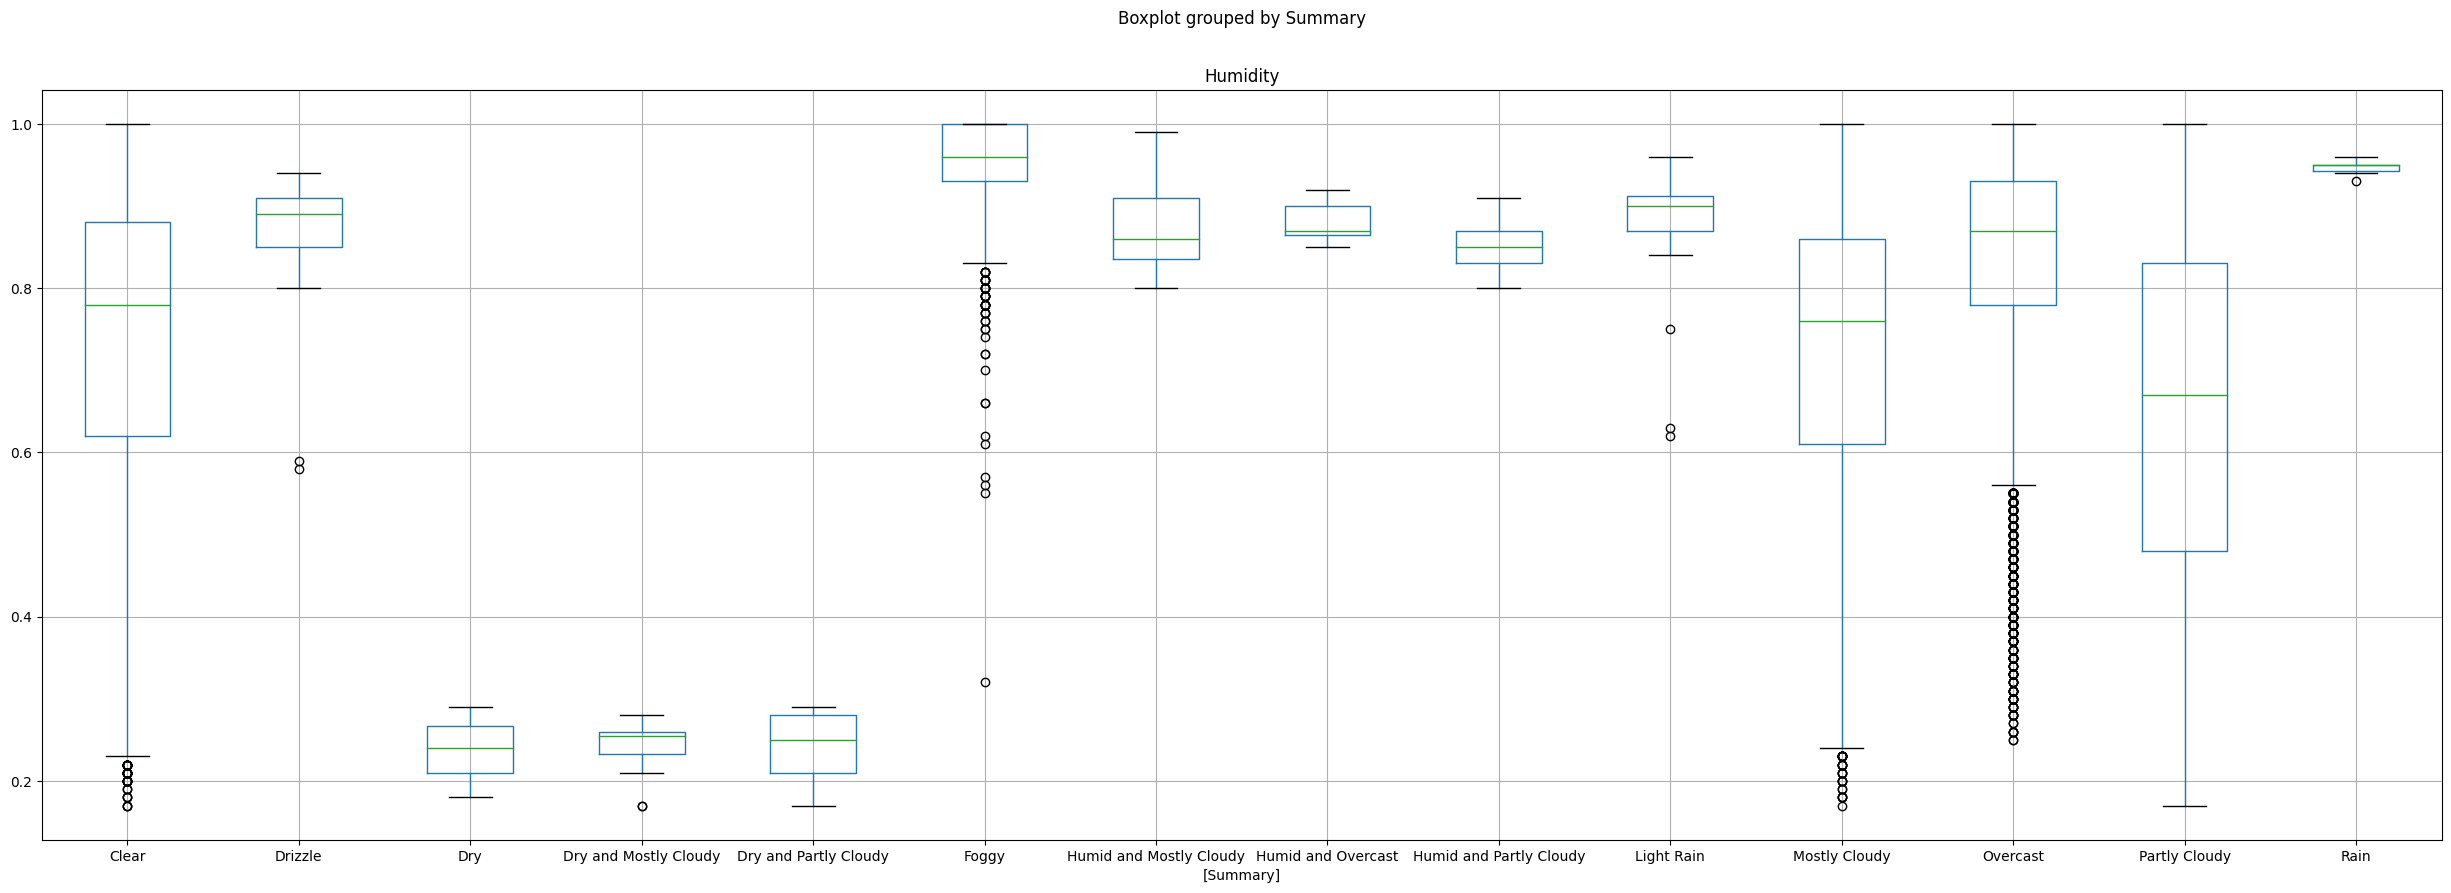

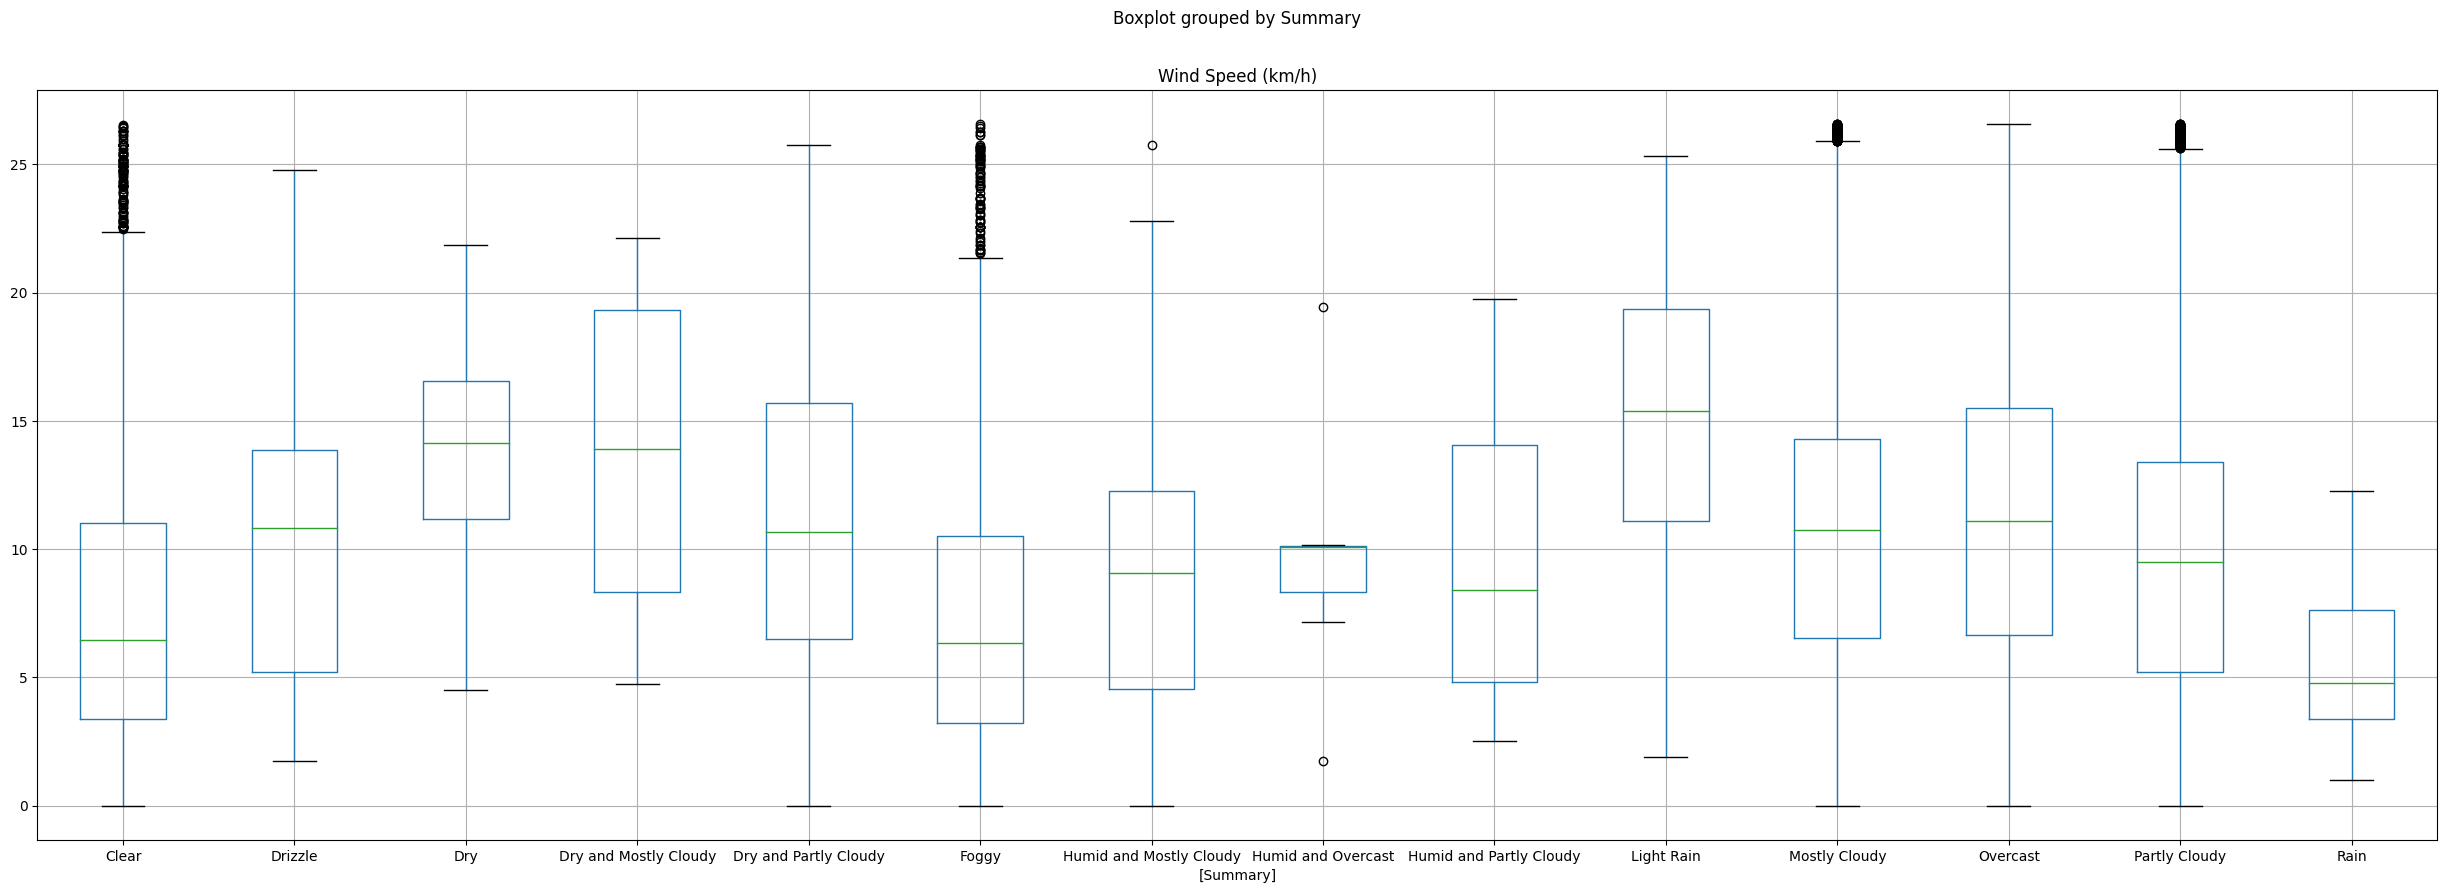

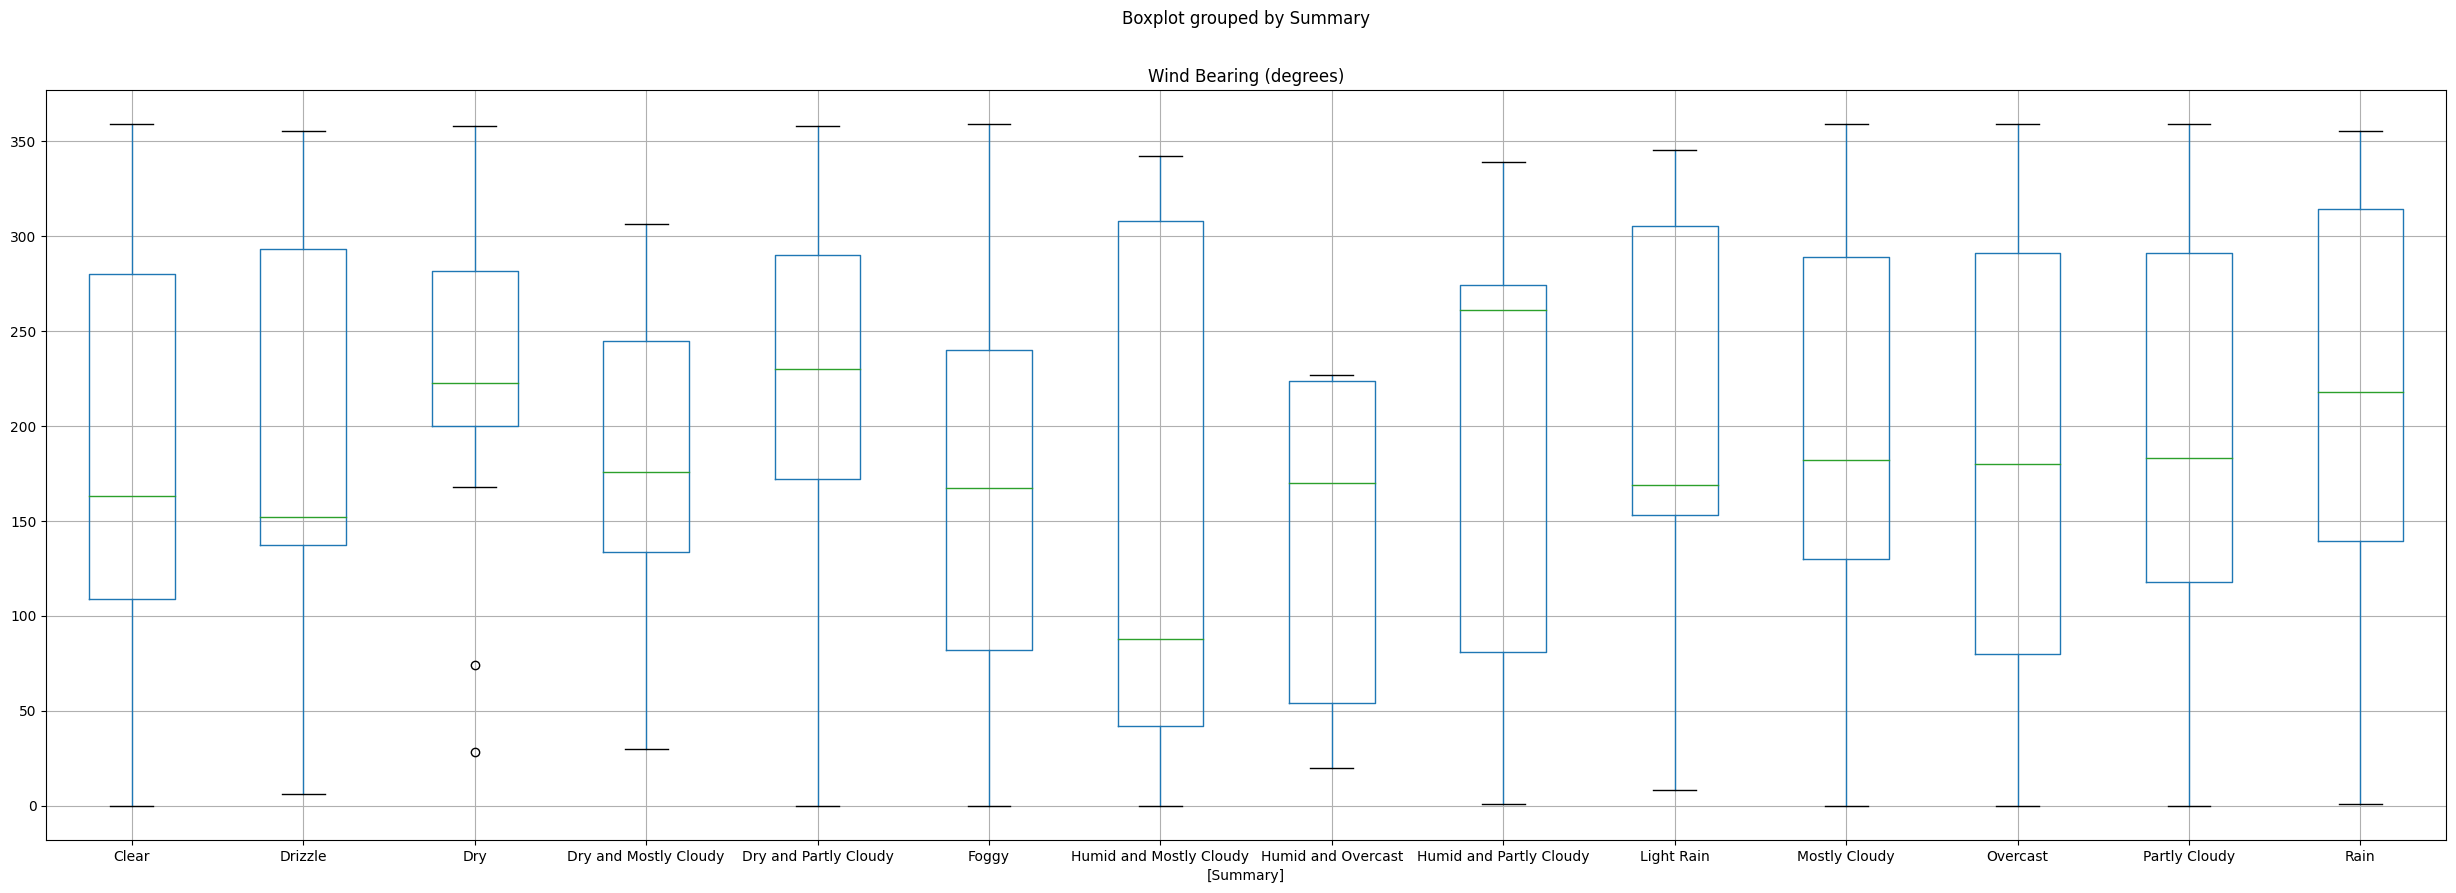

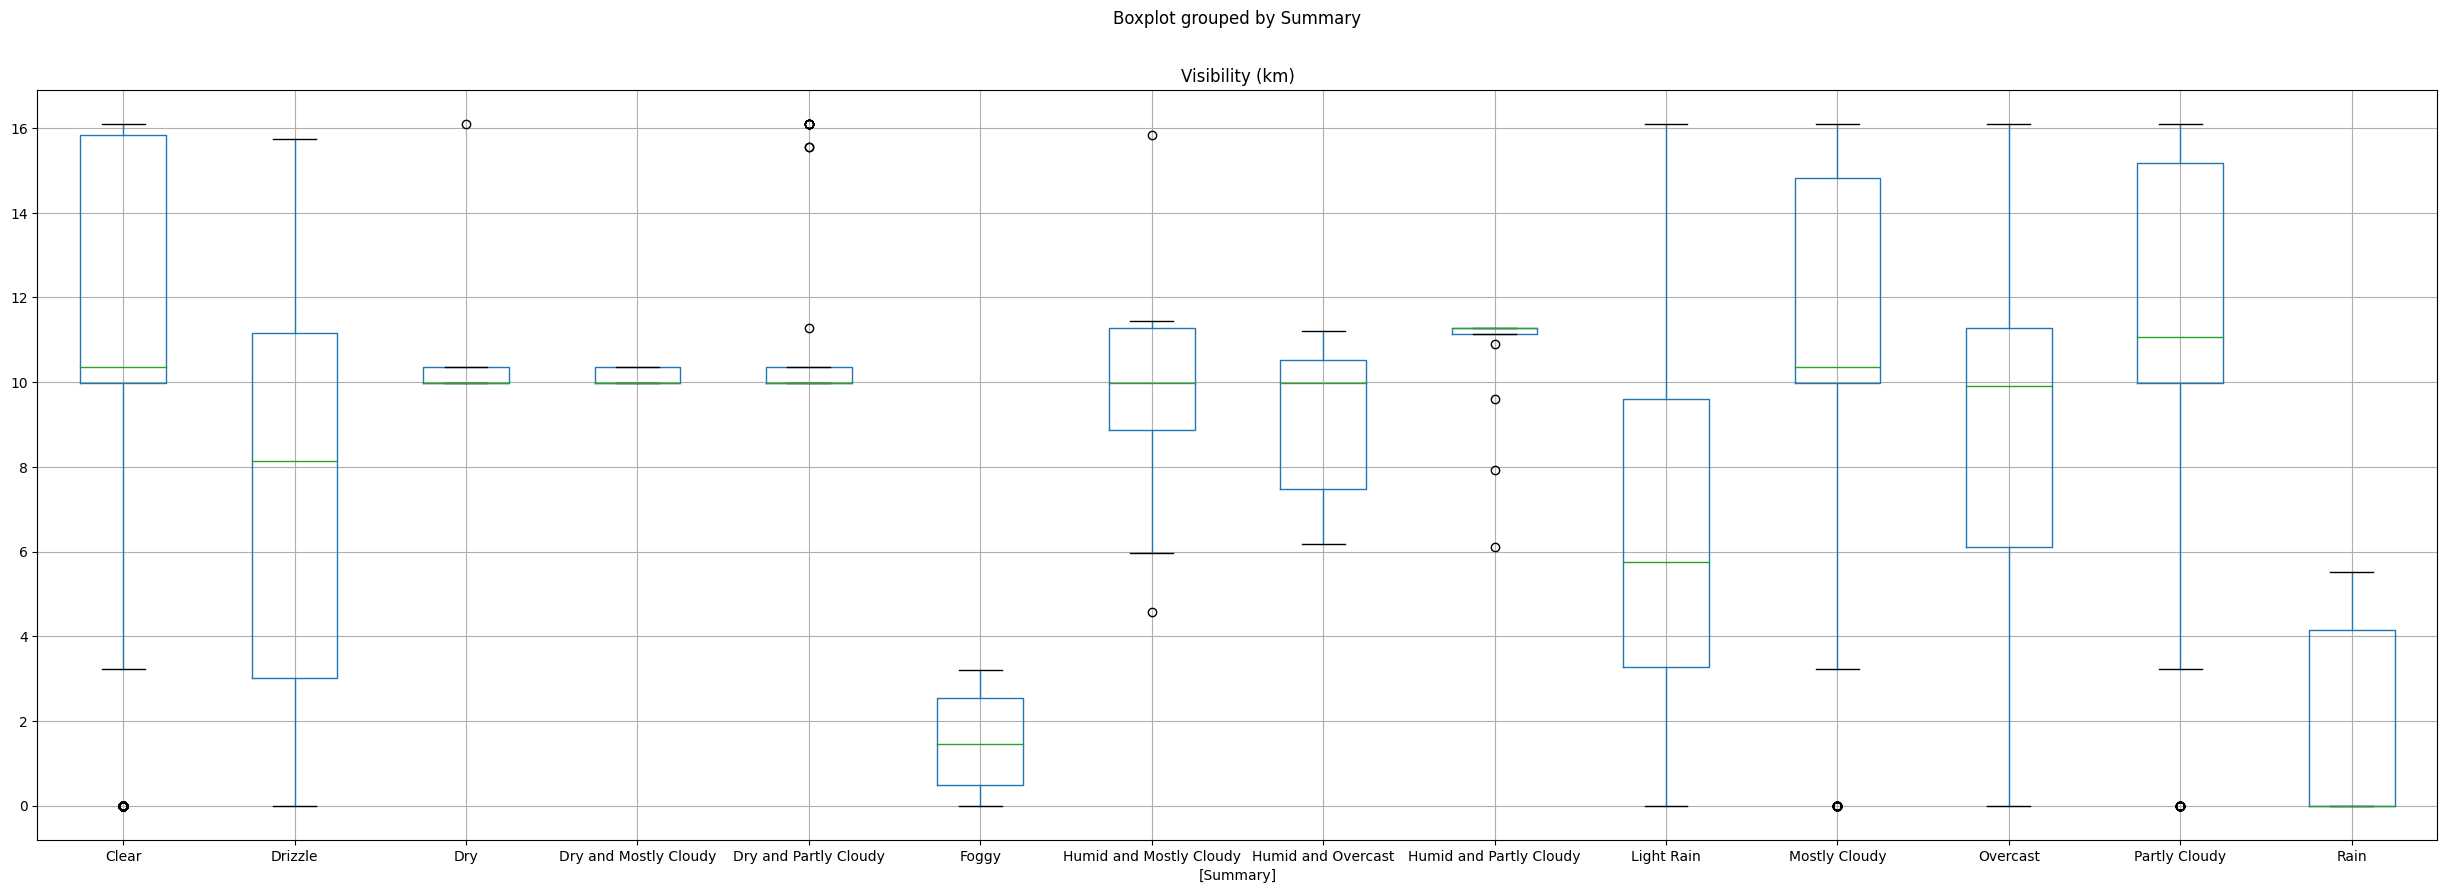

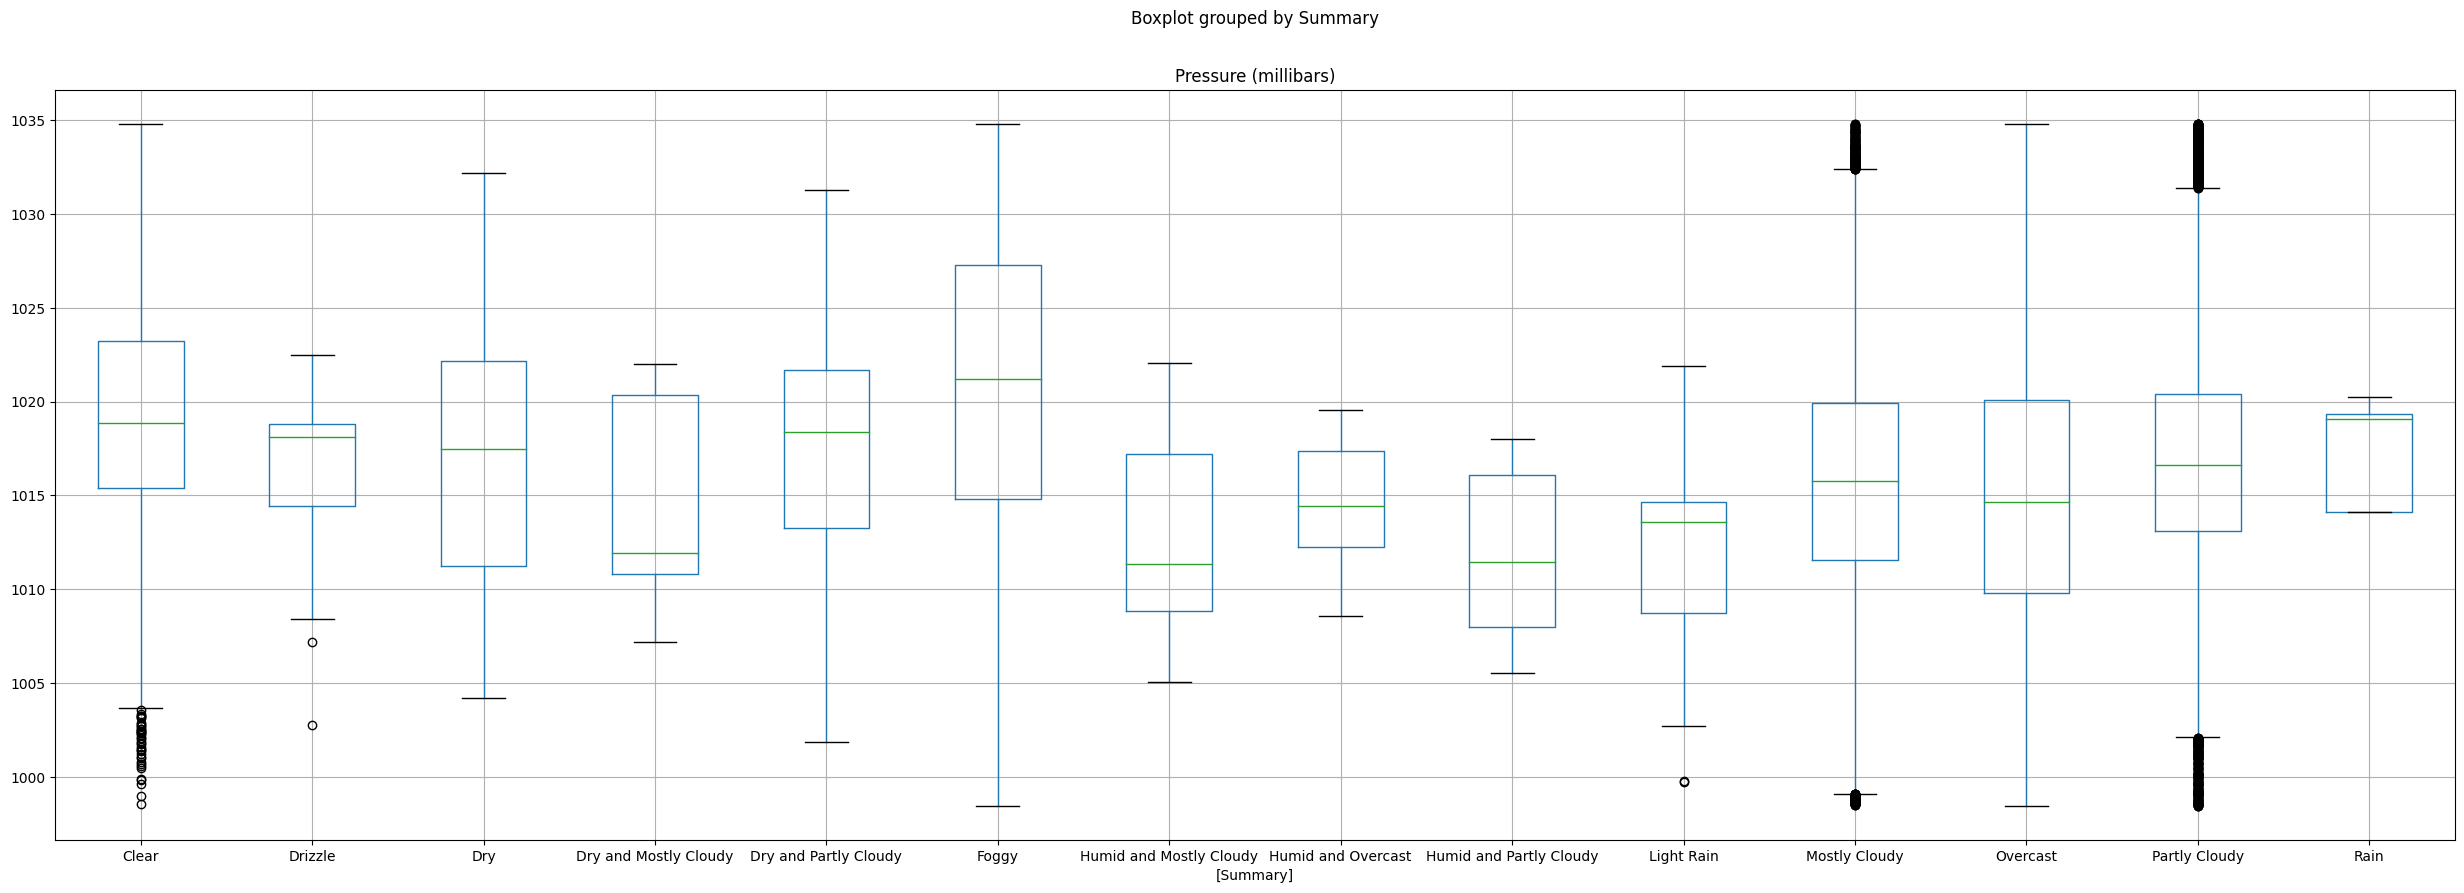

In [93]:
for column in num_columns:
  df[[column, "Summary"]].boxplot(by="Summary", figsize=(30, 10))